# imbalanced-learn
the Python library imbalanced-learn is compatible with scikit-learn and is part of scikit-learn-contrib projects.

In [1]:
import imblearn

lets create a imbalanced dataset to easily portray features of imbalanced learn.Using make classification function of sklearn.dataset

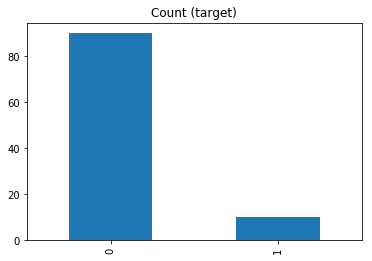

In [8]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
We will create a 2d plot to check our data distribution.As our data contain multiple features we will use
Principal component analysis method to reduce dimensionality into two features.

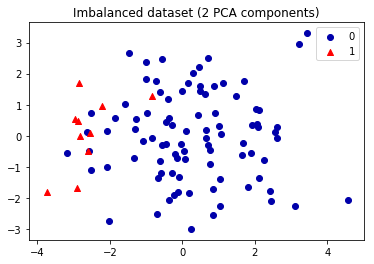

In [41]:
from sklearn.decomposition import PCA
import numpy as np

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#0000AA', '#FF0000']
    markers = ['o', '^']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
    
pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset')

# Tomek Link

Tomek link are defined as pair of value close to each other but belonging to different class.By removing the
instance of majority class ,creates a gap between two facilitating easier cllassification.

('Removed indexes:', array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 90, 91, 92, 93, 94, 95, 97, 98, 99]))


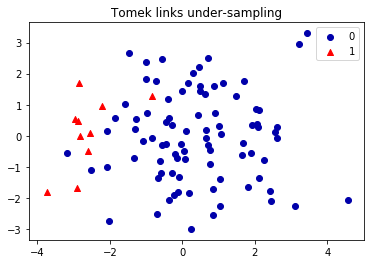

In [43]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True)
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

In [ ]:
We can see that how instances of majority class which were closer to minority class are now removed,thus making 
it much easier to classify.

# Cluster centroid

Cluster centroid is a technique of undersampling under which we first we cluster our data into to preserve information.Method that under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm. This algorithm keeps N majority samples by fitting the KMeans algorithm with N cluster to the majority class and using the coordinates of the N cluster centroids as the new majority samples.


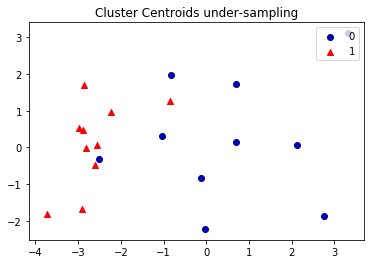

In [58]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

# SMOTE

SMOTE(synthetic minority oversampling technique) is used for creating synthetic value of minority class by using already exicting values.It works by picking a random minority value and calculate its k-nearest neighbour and place a synthetic value between the choosen value and neighbour.


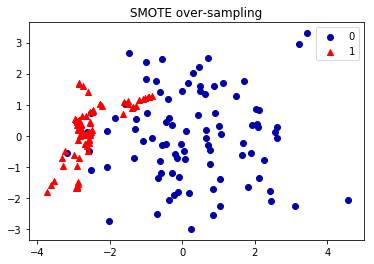

In [65]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

We can also do combination of undersampling and oversampling method to get desired result.

Now we will do SMOTE followed by Totem Links.

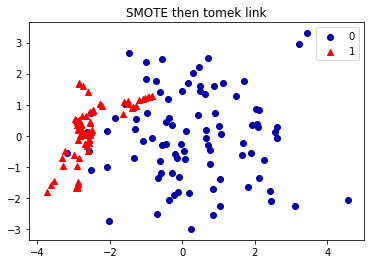

In [73]:
smote = SMOTE()
tl = TomekLinks()

X_s,y_s = smote.fit_sample(X, y)
X_tl,y_Tl = tl.fit_sample(X_s,y_s)

plot_2d_space(X_sm, y_sm, 'SMOTE then tomek link')